In [1]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv("Auction_master_train_en.csv")

In [3]:
data_train.head(2).T

,0,1
Auction_key,2687,2577
Auction_class,random,random
Bid_class,individual,general
Claim_price,1766037301,152946867
Appraisal_date,2017-07-26 00:00:00,2016-09-12 00:00:00
Auction_count,2,2
Appraisal_company,정명감정,희감정
Auction_miscarriage_count,1,1
Total_land_gross_area,12592,42478.1
Total_land_real_area,37.35,18.76


In [4]:
data_complete=data_train.drop(['Auction_key','First_auction_date','Close_result','Final_result','Final_auction_date','addr_etc','Specific','addr_en','Preserve_regist_date','Appraisal_date','Appraisal_company','Close_date'],axis=1)

In [411]:
#data_complete['Close_result']=data_complete['Close_result'].fillna(data_complete['Close_result'].mode()[0])

In [5]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 20 columns):
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
Creditor                       1933 non-null object
Apartment_usage                1933 non-null object
Total_floor                    1933 non-null int64
Current_floor                  1933 non-null int64
Share_auction_YorN             1933 non-null object
point.y    

In [8]:
le = LabelEncoder()
data_complete['Auction_class'] = le.fit_transform(data_complete['Auction_class'])
data_complete['Bid_class'] = le.fit_transform(data_complete['Bid_class'])
#data_complete['addr_en'] = le.fit_transform(data_complete['addr_en'])
data_complete['Creditor'] = le.fit_transform(data_complete['Creditor'])
data_complete['Apartment_usage'] = le.fit_transform(data_complete['Apartment_usage'])
data_complete['Share_auction_YorN'] = le.fit_transform(data_complete['Share_auction_YorN'])
#data_complete['Close_result'] = le.fit_transform(data_complete['Close_result'])



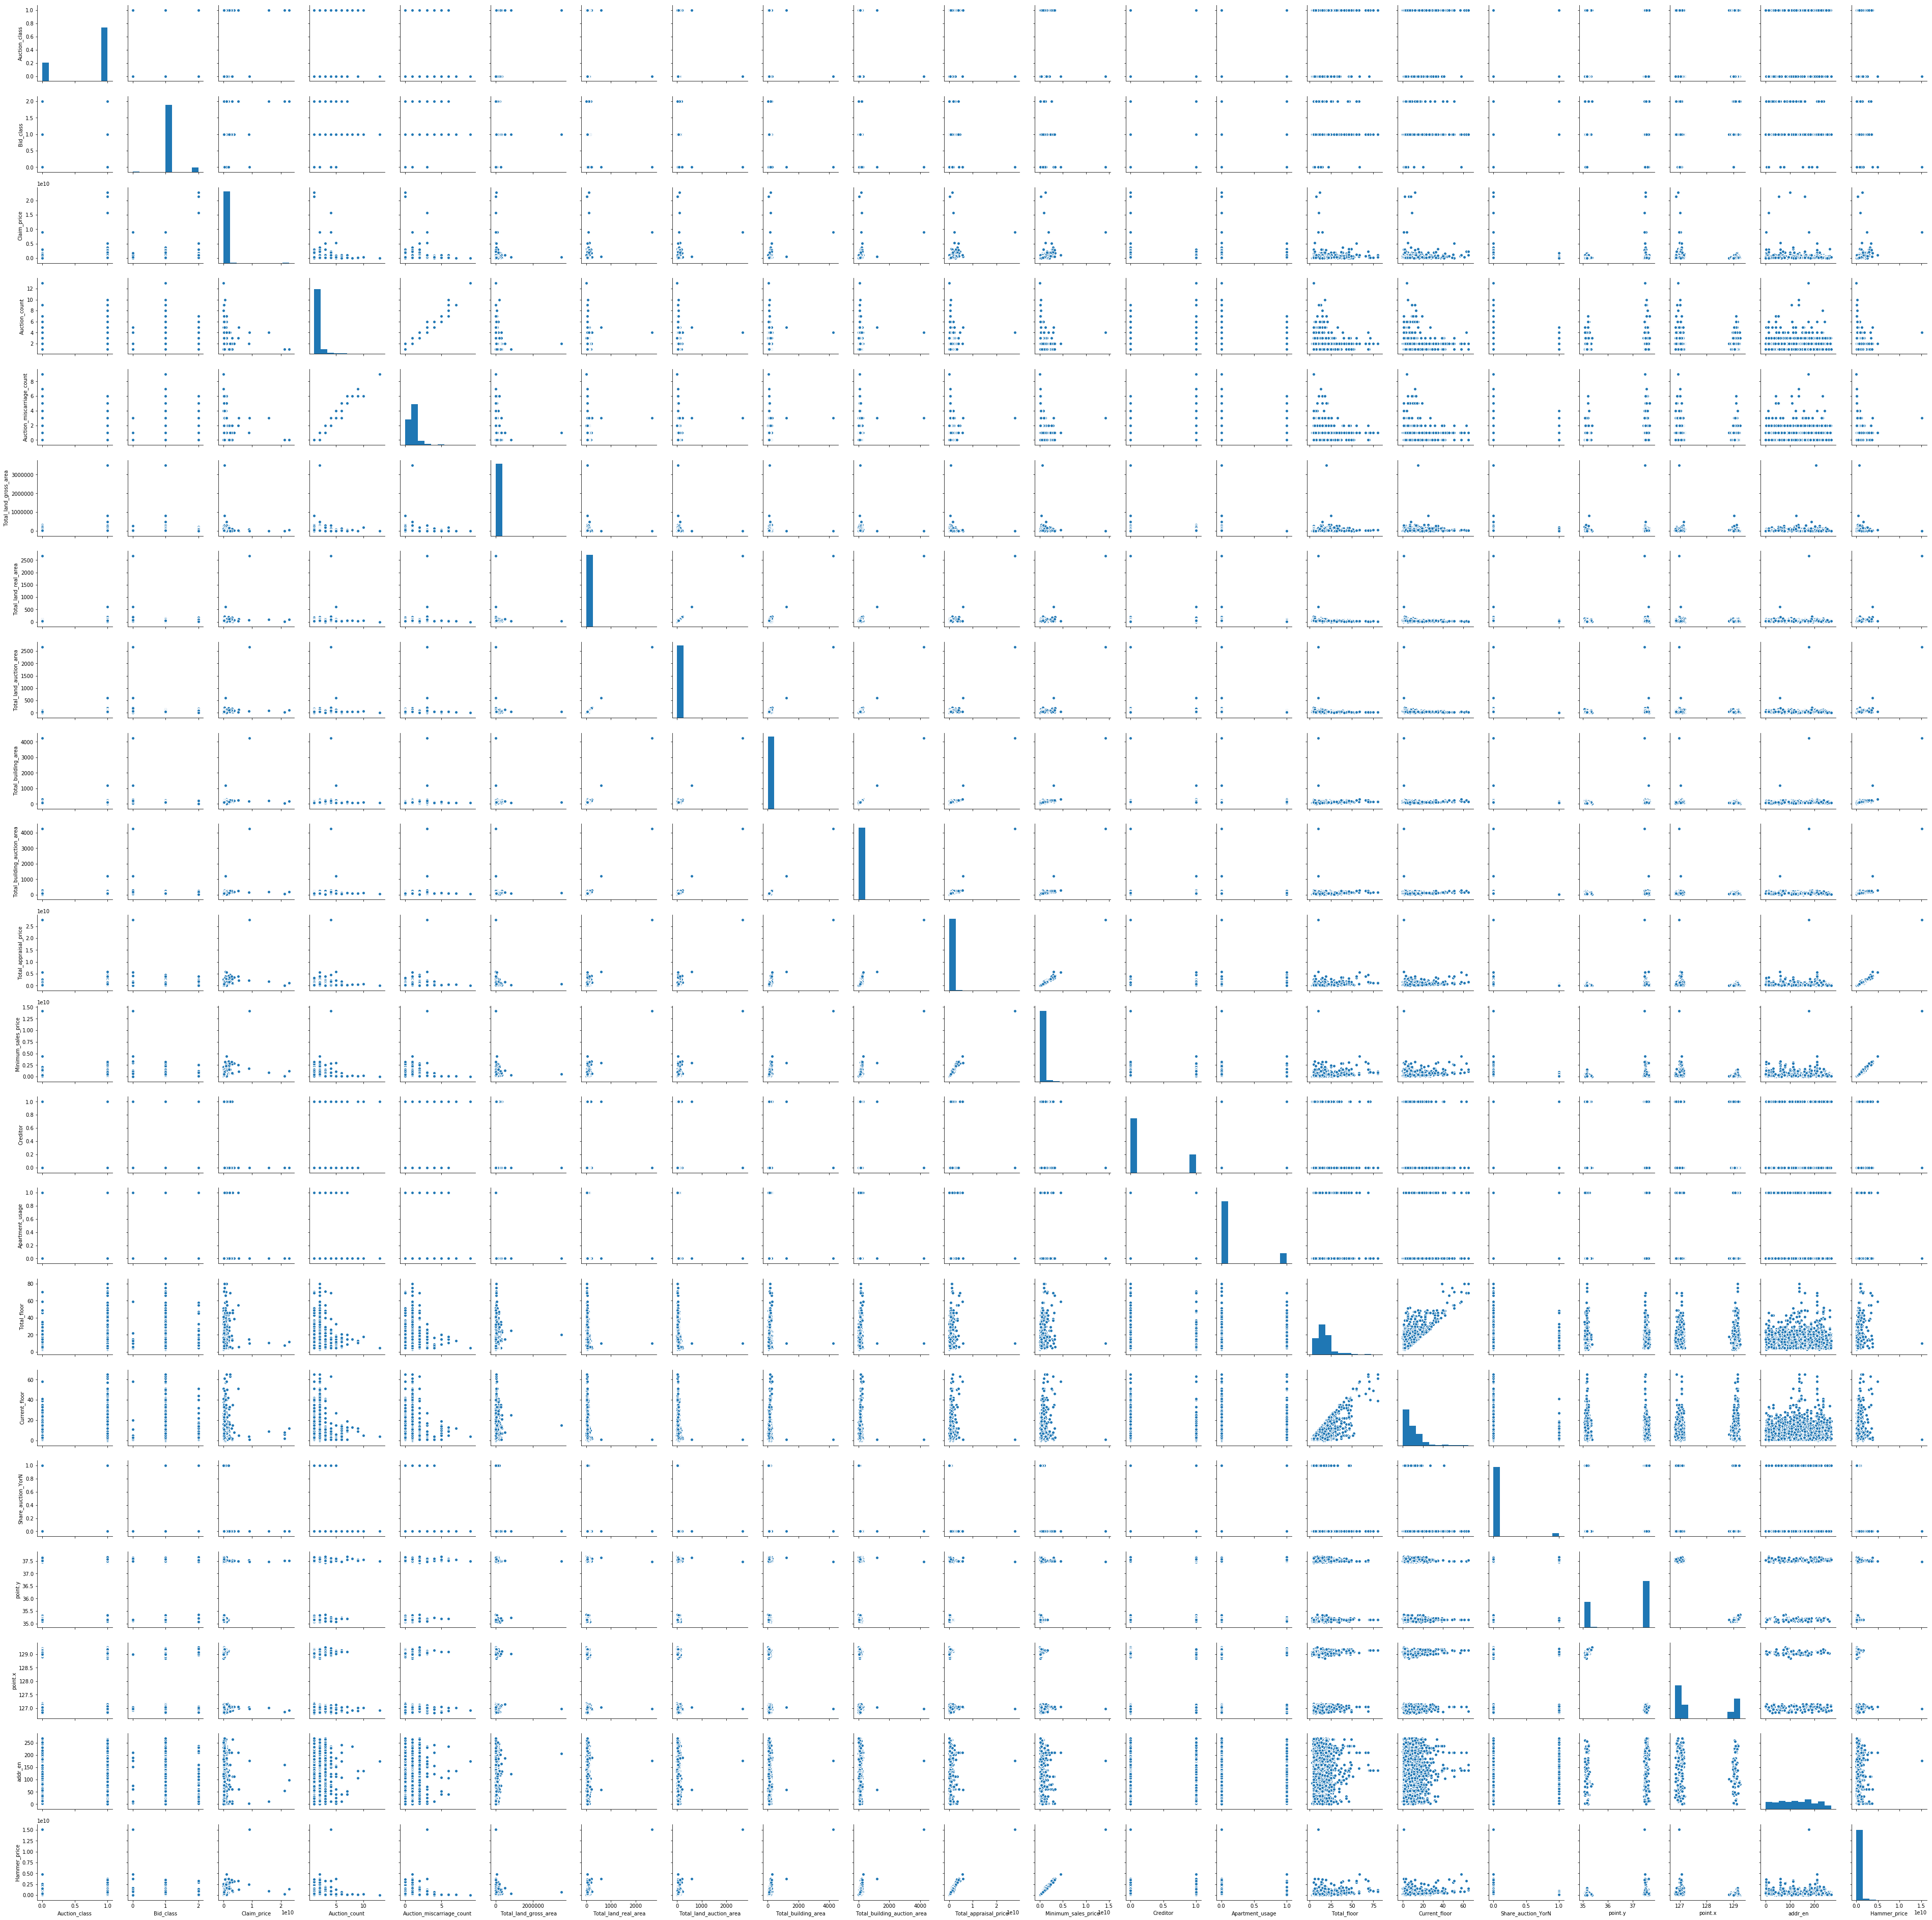

In [374]:
sn.pairplot(data_complete)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_features = list(data_complete)
#x_features.remove('Hammer_price')
#x_features.remove('point.x')
x_features.remove('point.y')
x_features.remove('Total_land_auction_area')
x_features.remove('Total_building_area')
#x_features.remove('Minimum_sales_price')
x_features.remove('Auction_count')
x_features.remove('Total_appraisal_price')

data_mat = data_complete[x_features].as_matrix()                                              
data_mat.shape                                                                       
vif = [ variance_inflation_factor( data_mat,i) for i in range(data_mat.shape[1]) ]   
vif_factors = pd.DataFrame()                                                         
vif_factors['column'] = list(x_features)                                             
vif_factors['vif'] = vif                                                             
print(vif_factors)

                         column         vif
0                 Auction_class    4.774952
1                     Bid_class   22.122066
2                   Claim_price    1.295202
3     Auction_miscarriage_count    2.305945
4         Total_land_gross_area    1.200983
5          Total_land_real_area   19.775777
6   Total_building_auction_area   29.101393
7           Minimum_sales_price  190.855223
8                      Creditor    1.561818
9               Apartment_usage    1.472663
10                  Total_floor   10.459171
11                Current_floor    4.563842
12           Share_auction_YorN    1.240398
13                      point.x   33.944386
14                 Hammer_price  181.091178


In [18]:
x_features.remove('Hammer_price')

In [19]:
x=data_complete[x_features]
y=data_complete['Hammer_price']

In [20]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [21]:
num_folds = 10
seed = 7
scoring = 'mean_squared_error'

In [22]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', AdaBoostRegressor(LinearRegression()))])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', BaggingRegressor(LinearRegression(),n_estimators=25))])))

In [23]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.sqrt(-cv_results.mean()), np.sqrt(cv_results.std()))
    print(msg)

ScaledLR: 66377256.353106 (62678331.161778)
ScaledKNN: 367087178.851227 (533003472.976314)
ScaledCART: 277419324.498890 (453212299.939143)
ScaledCART: 86250700.420131 (85390932.631300)
ScaledLR: 63537220.923753 (56127814.259214)


In [24]:
#lr=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=25)
lr=LinearRegression()
model=lr.fit(X_train,Y_train)

In [25]:
model.score(X_train,Y_train)

0.9913039927353094

In [26]:
model.score(X_validation,Y_validation)

0.9841718998557105

In [27]:
data_train=pd.read_csv("Auction_master_test_en.csv")

In [28]:
X_test=data_train.drop(['Auction_key','First_auction_date','Close_result','Final_result','Final_auction_date','addr_etc','Specific','addr_en','Preserve_regist_date','Appraisal_date','Appraisal_company','Close_date'],axis=1)

In [29]:
le = LabelEncoder()
X_test['Auction_class'] = le.fit_transform(X_test['Auction_class'])
X_test['Bid_class'] = le.fit_transform(X_test['Bid_class'])
#X_test['addr_en'] = le.fit_transform(X_test['addr_en'])
X_test['Creditor'] = le.fit_transform(X_test['Creditor'])
X_test['Apartment_usage'] = le.fit_transform(X_test['Apartment_usage'])
X_test['Share_auction_YorN'] = le.fit_transform(X_test['Share_auction_YorN'])
#data_complete['Close_result'] = le.fit_transform(data_complete['Close_result'])


In [30]:
x_test=X_test[x_features]

In [31]:
pd.DataFrame(model.predict(x_test)).to_csv('Pred.csv')